In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
jma_df = pd.read_csv('JMA_dataset.csv')  # Replace with the correct path
print(jma_df.head())

         Date      Time    震央地名        Lat        Long  Depth    M 最大震度  \
0  12/31/1985   2:26:48   島根県東部  35°20.3'N  133°12.7'E     12  3.6  震度１   
1  12/30/1985  19:11:46    茨城県沖  36°24.4'N  140°41.8'E     55  3.3  震度１   
2  12/30/1985  15:56:17   福島県会津  37°12.6'N  139°56.2'E      6  3.5  震度１   
3  12/30/1985  15:20:15  奄美大島近海  27°58.1'N  129°39.9'E      0  4.2  震度１   
4  12/29/1985   9:22:20     釧路沖  42°53.3'N  145°26.7'E     35  3.7  震度２   

  Source.Name  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [3]:
# Step 1: Combine Date and Time into a single `Datetime` column
jma_df['Datetime'] = pd.to_datetime(jma_df['Date'] + ' ' + jma_df['Time'], format='%m/%d/%Y %H:%M:%S')

In [4]:
#show the data
print(jma_df.head())

         Date      Time    震央地名        Lat        Long  Depth    M 最大震度  \
0  12/31/1985   2:26:48   島根県東部  35°20.3'N  133°12.7'E     12  3.6  震度１   
1  12/30/1985  19:11:46    茨城県沖  36°24.4'N  140°41.8'E     55  3.3  震度１   
2  12/30/1985  15:56:17   福島県会津  37°12.6'N  139°56.2'E      6  3.5  震度１   
3  12/30/1985  15:20:15  奄美大島近海  27°58.1'N  129°39.9'E      0  4.2  震度１   
4  12/29/1985   9:22:20     釧路沖  42°53.3'N  145°26.7'E     35  3.7  震度２   

  Source.Name            Datetime  
0         NaN 1985-12-31 02:26:48  
1         NaN 1985-12-30 19:11:46  
2         NaN 1985-12-30 15:56:17  
3         NaN 1985-12-30 15:20:15  
4         NaN 1985-12-29 09:22:20  


In [5]:
#change the column names
jma_df.rename(columns={'Lat':'Latitude', 'Long':'Longitude', 'Depth':'Depth', 'M':'Magnitude'}, inplace=True)

# Display the first few rows of the updated dataset
print("\nJMA Dataset:")
print(jma_df.head())


JMA Dataset:
         Date      Time    震央地名   Latitude   Longitude  Depth Magnitude 最大震度  \
0  12/31/1985   2:26:48   島根県東部  35°20.3'N  133°12.7'E     12       3.6  震度１   
1  12/30/1985  19:11:46    茨城県沖  36°24.4'N  140°41.8'E     55       3.3  震度１   
2  12/30/1985  15:56:17   福島県会津  37°12.6'N  139°56.2'E      6       3.5  震度１   
3  12/30/1985  15:20:15  奄美大島近海  27°58.1'N  129°39.9'E      0       4.2  震度１   
4  12/29/1985   9:22:20     釧路沖  42°53.3'N  145°26.7'E     35       3.7  震度２   

  Source.Name            Datetime  
0         NaN 1985-12-31 02:26:48  
1         NaN 1985-12-30 19:11:46  
2         NaN 1985-12-30 15:56:17  
3         NaN 1985-12-30 15:20:15  
4         NaN 1985-12-29 09:22:20  


In [6]:
import numpy as np
import re
import pandas as pd

# Updated function to handle both DMS and decimal formats
def dms_to_decimal(coord):
    # Check if the value is NaN
    if pd.isna(coord):
        return np.nan

    # If the coordinate is already in decimal format, return it as a float
    try:
        # Try converting directly to float; if it works, we have a decimal value
        return float(coord)
    except ValueError:
        # If direct conversion fails, it's likely in DMS format
        pass

    # For DMS format, extract degrees, minutes, and direction
    match = re.match(r"(\d+)°(\d+\.\d+)'([NSEW])", str(coord))
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        direction = match.group(3)

        # Convert DMS to decimal degrees
        decimal = degrees + (minutes / 60)

        # Make coordinates negative for South and West
        if direction in ['S', 'W']:
            decimal = -decimal

        return decimal
    else:
        raise ValueError(f"Invalid coordinate format: {coord}")

# Replace '不明' with NaN in the dataset
jma_df.replace('不明', np.nan, inplace=True)

# Apply the function to the Latitude and Longitude columns
jma_df['Latitude'] = jma_df['Latitude'].apply(dms_to_decimal)
jma_df['Longitude'] = jma_df['Longitude'].apply(dms_to_decimal)

# Display the updated dataset
print("\nUpdated JMA Dataset with Decimal Coordinates:")
print(jma_df.head())


Updated JMA Dataset with Decimal Coordinates:
         Date      Time    震央地名   Latitude   Longitude  Depth Magnitude 最大震度  \
0  12/31/1985   2:26:48   島根県東部  35.338333  133.211667     12       3.6  震度１   
1  12/30/1985  19:11:46    茨城県沖  36.406667  140.696667     55       3.3  震度１   
2  12/30/1985  15:56:17   福島県会津  37.210000  139.936667      6       3.5  震度１   
3  12/30/1985  15:20:15  奄美大島近海  27.968333  129.665000      0       4.2  震度１   
4  12/29/1985   9:22:20     釧路沖  42.888333  145.445000     35       3.7  震度２   

  Source.Name            Datetime  
0         NaN 1985-12-31 02:26:48  
1         NaN 1985-12-30 19:11:46  
2         NaN 1985-12-30 15:56:17  
3         NaN 1985-12-30 15:20:15  
4         NaN 1985-12-29 09:22:20  


In [7]:
# Step 3: Clean and remove unnecessary columns
jma_df = jma_df.drop(columns=['Date', 'Time', '震央地名', '最大震度', 'Source.Name'])
print(jma_df.head())

    Latitude   Longitude  Depth Magnitude            Datetime
0  35.338333  133.211667     12       3.6 1985-12-31 02:26:48
1  36.406667  140.696667     55       3.3 1985-12-30 19:11:46
2  37.210000  139.936667      6       3.5 1985-12-30 15:56:17
3  27.968333  129.665000      0       4.2 1985-12-30 15:20:15
4  42.888333  145.445000     35       3.7 1985-12-29 09:22:20


In [8]:
# Step 4: Handle missing values
jma_df = jma_df.dropna()
print(jma_df.head())
#statistical summary
print(jma_df.describe())

    Latitude   Longitude  Depth Magnitude            Datetime
0  35.338333  133.211667     12       3.6 1985-12-31 02:26:48
1  36.406667  140.696667     55       3.3 1985-12-30 19:11:46
2  37.210000  139.936667      6       3.5 1985-12-30 15:56:17
3  27.968333  129.665000      0       4.2 1985-12-30 15:20:15
4  42.888333  145.445000     35       3.7 1985-12-29 09:22:20
           Latitude     Longitude         Depth                       Datetime
count  85334.000000  85334.000000  85334.000000                          85334
mean      35.582772    137.751368     25.999203  2007-04-04 09:30:23.121276416
min        4.476667    120.685000      0.000000            1985-01-01 00:58:14
25%       34.116667    135.123333      8.000000     2000-07-12 21:19:32.750000
50%       35.436667    139.278333     14.000000            2008-12-29 20:04:59
75%       37.363333    140.970000     38.000000  2014-08-08 03:47:35.750000128
max       55.956667    158.505000    695.000000            2022-10-04 16:19

In [9]:
# Step 5: Feature engineering
jma_df['Year'] = jma_df['Datetime'].dt.year
jma_df['Month'] = jma_df['Datetime'].dt.month
jma_df['Day'] = jma_df['Datetime'].dt.day
jma_df['Hour'] = jma_df['Datetime'].dt.hour
jma_df['DayOfWeek'] = jma_df['Datetime'].dt.dayofweek
jma_df['TimeDiff'] = (jma_df['Datetime'] - jma_df['Datetime'].shift(1)).dt.total_seconds().fillna(0)

In [10]:
jma_df['Minutes'] = jma_df['Datetime'].dt.minute
#show the data
print(jma_df.head())

    Latitude   Longitude  Depth Magnitude            Datetime  Year  Month  \
0  35.338333  133.211667     12       3.6 1985-12-31 02:26:48  1985     12   
1  36.406667  140.696667     55       3.3 1985-12-30 19:11:46  1985     12   
2  37.210000  139.936667      6       3.5 1985-12-30 15:56:17  1985     12   
3  27.968333  129.665000      0       4.2 1985-12-30 15:20:15  1985     12   
4  42.888333  145.445000     35       3.7 1985-12-29 09:22:20  1985     12   

   Day  Hour  DayOfWeek  TimeDiff  Minutes  
0   31     2          1       0.0       26  
1   30    19          0  -26102.0       11  
2   30    15          0  -11729.0       56  
3   30    15          0   -2162.0       20  
4   29     9          6 -107875.0       22  


In [11]:
# Drop the `Datetime` column (optional, as time features are extracted)
jma_df = jma_df.drop(columns=['Datetime'])
print(jma_df.head())

    Latitude   Longitude  Depth Magnitude  Year  Month  Day  Hour  DayOfWeek  \
0  35.338333  133.211667     12       3.6  1985     12   31     2          1   
1  36.406667  140.696667     55       3.3  1985     12   30    19          0   
2  37.210000  139.936667      6       3.5  1985     12   30    15          0   
3  27.968333  129.665000      0       4.2  1985     12   30    15          0   
4  42.888333  145.445000     35       3.7  1985     12   29     9          6   

   TimeDiff  Minutes  
0       0.0       26  
1  -26102.0       11  
2  -11729.0       56  
3   -2162.0       20  
4 -107875.0       22  


In [12]:
# Step 6: Prepare target and features
X_jma = jma_df.drop(columns=['Magnitude'])
y_jma = jma_df['Magnitude']

In [13]:
#show the data
print(X_jma.head())

    Latitude   Longitude  Depth  Year  Month  Day  Hour  DayOfWeek  TimeDiff  \
0  35.338333  133.211667     12  1985     12   31     2          1       0.0   
1  36.406667  140.696667     55  1985     12   30    19          0  -26102.0   
2  37.210000  139.936667      6  1985     12   30    15          0  -11729.0   
3  27.968333  129.665000      0  1985     12   30    15          0   -2162.0   
4  42.888333  145.445000     35  1985     12   29     9          6 -107875.0   

   Minutes  
0       26  
1       11  
2       56  
3       20  
4       22  


In [14]:
# show the data
print(y_jma.head())

0    3.6
1    3.3
2    3.5
3    4.2
4    3.7
Name: Magnitude, dtype: object


In [15]:
print(f"Type of y_jma_transformed: {y_jma.dtype}")
print(y_jma[:5])  # Display the first 5 labels for inspection

Type of y_jma_transformed: object
0    3.6
1    3.3
2    3.5
3    4.2
4    3.7
Name: Magnitude, dtype: object


In [16]:
# Ensure y_jma_transformed is in a numeric format
y_jma = y_jma.astype(float)

# Verify the new data type
print(f"New type of y_jma: {y_jma.dtype}")

New type of y_jma: float64


In [17]:
print("Original shape of x:", X_jma.shape)
print("Original shape of y:", y_jma.shape)

Original shape of x: (85334, 10)
Original shape of y: (85334,)


In [18]:
# Step 7: Reshape for CNN-GRU (3D)
import numpy as np
import pandas as pd

def create_sliding_window(data, labels, window_size):
    """
    Create sliding windows for data and corresponding labels.

    Args:
        data (numpy.ndarray or pandas.DataFrame): Input features with shape (n_samples, n_features).
        labels (pandas.Series): Corresponding labels as a pandas.Series.
        window_size (int): The number of time steps for each sliding window.

    Returns:
        tuple: Transformed data and labels in the shape (n_windows, window_size, n_features) and (n_windows,).
    """
    # Reset indices for labels to ensure numeric indexing
    labels = labels.reset_index(drop=True)

    x_seq = []
    y_seq = []

    # Iterate to create sliding windows
    for i in range(len(data) - window_size + 1):
        x_seq.append(data[i:i + window_size])  # Append sliding window for features
        y_seq.append(labels[i + window_size - 1])  # Append corresponding label (last step in window)

    return np.array(x_seq), np.array(y_seq)

In [19]:
# Example usage for debugging
# Assuming X_jma is a numpy array or pandas DataFrame and y_jma a pandas Series
window_size = 10  # Number of time steps
X_jma, y_jma= create_sliding_window(X_jma, y_jma, window_size)

print(f"New X_jma shape: {X_jma.shape}")  # Outputs new shape
print(f"New y_jma shape: {y_jma.shape}")  # Outputs new shape

New X_jma shape: (85325, 10, 10)
New y_jma shape: (85325,)


In [20]:
# Save the preprocessed data New X_jma shape: (85332, 3, 10) New y_jma shape: (85332,)
np.save('X_jma.npy', X_jma)
np.save('y_jma.npy', y_jma)

print("Preprocessing complete. Data saved.")
#show the data shape
print(X_jma.shape)
print(y_jma.shape)

Preprocessing complete. Data saved.
(85325, 10, 10)
(85325,)


In [111]:
# Check if y_jma is a pandas DataFrame or Series
if not isinstance(y_jma, np.ndarray):
    # Convert DataFrame or Series to NumPy array if needed
    y_jma = y_jma.to_numpy()

# Reshape y_jma to (85334, 1) to match the model output shape
y_jma = y_jma.reshape(-1, 1)

# Verify the new shape
print("Reshaped y_jma:", y_jma.shape)

Reshaped y_jma: (85325, 1)


In [112]:
#show the data shape
print(X_jma.shape)
print(y_jma.shape)

(85325, 10, 10)
(85325, 1)


In [113]:
# Save preprocessed data
np.save('X_jma_cnn_gru.npy', X_jma)
np.save('y_jma_cnn_gru.npy', y_jma)

print("Preprocessing complete. Data saved.")

#show the data shape
print(X_jma.shape)
print(y_jma.shape)

Preprocessing complete. Data saved.
(85325, 10, 10)
(85325, 1)


In [114]:
import numpy as np

# Check the saved data shape
X_jma = np.load('X_jma_cnn_gru.npy')  # Loading the first array

# Enable allow_pickle=True to properly load object arrays
y_jma = np.load('y_jma_cnn_gru.npy', allow_pickle=True)

print("Loaded X_jma shape:", X_jma.shape)
print("Loaded y_jma shape:", y_jma.shape)

Loaded X_jma shape: (85325, 10, 10)
Loaded y_jma shape: (85325, 1)


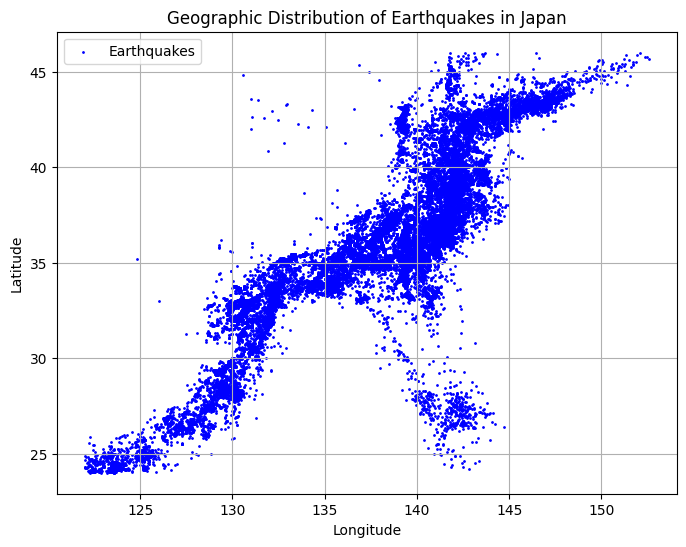

In [21]:
import matplotlib.pyplot as plt

# Assuming `jma_df` is already loaded as per the provided structure

# Filter data for Japan region (approximate latitude and longitude bounds)
japan_data = jma_df[(jma_df['Latitude'] >= 24) & (jma_df['Latitude'] <= 46) &
                    (jma_df['Longitude'] >= 122) & (jma_df['Longitude'] <= 153)]

# Plotting the earthquake distribution
plt.figure(figsize=(8, 6))
plt.scatter(japan_data['Longitude'], japan_data['Latitude'], s=1, color='blue', label='Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Earthquakes in Japan')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# save the data
